In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import pickle
from time import gmtime, strftime
import os
import mlflow
import warnings
import pickle
from pathlib import Path

In [2]:
df = pd.read_csv(r'D:\project\data\Date.csv',index_col='Date',parse_dates=True)

In [3]:
# Assuming 'df' is your DataFrame with the index frequency set to 'MS'
df_weekly = df.asfreq('W', method='ffill')  # Forward fill missing values


In [4]:
df.head()

,Sales
Date,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570


<AxesSubplot:xlabel='Date'>

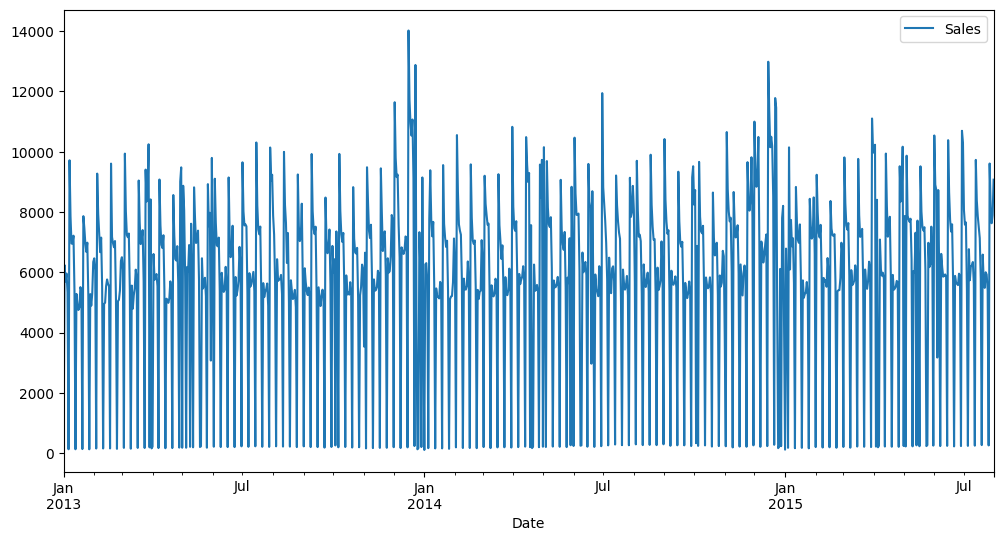

In [5]:
df.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

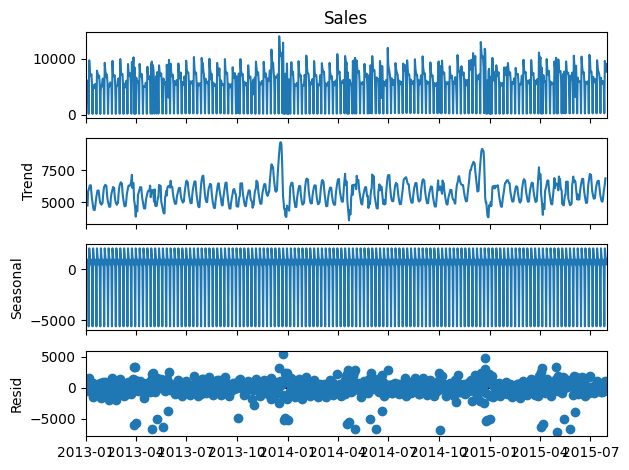

In [7]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [8]:
len(df)

942

In [9]:
# Define training and testing periods
train_end_date = df.index[-6 * 7]  # Last six weeks for testing
train_data = df[df.index < train_end_date]
test_data = df[df.index >= train_end_date]


In [10]:
train_data.head()

,Sales
Date,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
df.head(),df.tail()

(                  Sales
 Date                   
 2013-01-01    87.284560
 2013-01-02  6233.030493
 2013-01-03  5693.112108
 2013-01-04  5954.218834
 2013-01-05  5337.751570,
                   Sales
 Date                   
 2015-07-27  9602.952466
 2015-07-28  8174.953363
 2015-07-29  7623.284305
 2015-07-30  7891.348879
 2015-07-31  9067.033184)

In [13]:
scaler.fit(train_data)
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [14]:
scaled_train[:10]

array([[0.        ],
       [0.44135045],
       [0.40257676],
       [0.42132788],
       [0.37705691],
       [0.0030002 ],
       [0.69105821],
       [0.55725808],
       [0.4926684 ],
       [0.49298283]])

In [38]:
save_path = r'D:\project\models\scaler.pkl'

# Save the scaler object to the specified path
with open(save_path, 'wb') as file:
    pickle.dump(scaler, file)

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
# define generator
n_input = 90
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [17]:
X,y = generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'predict this y: \n {y}')

Given the array: 
[0.         0.44135045 0.40257676 0.42132788 0.37705691 0.0030002
 0.69105821 0.55725808 0.4926684  0.49298283 0.51152056 0.38130121
 0.00300973 0.37288301 0.34878204 0.3346401  0.340665   0.38899909
 0.38083111 0.00349587 0.55800758 0.52961788 0.49266582 0.47291041
 0.49487022 0.37043437 0.00293218 0.37236221 0.34492257 0.37436379
 0.44899803 0.45765692 0.43052438 0.00478176 0.65929279 0.56319429
 0.51509497 0.47228179 0.5069644  0.39054544 0.0048461  0.34906988
 0.35206114 0.39145539 0.40737329 0.39660191 0.39061777 0.00496867
 0.6831228  0.50825937 0.49351632 0.48399127 0.49874656 0.35685574
 0.00397616 0.35540142 0.35900004 0.38072232 0.4516004  0.46031205
 0.43037038 0.00630589 0.70689168 0.56975944 0.51304283 0.50781747
 0.51659887 0.38412817 0.00435358 0.39270431 0.33756406 0.36927292
 0.38649256 0.43062788 0.40974129 0.00616697 0.6428396  0.54301476
 0.49152768 0.50235935 0.52483262 0.40193855 0.00603583 0.66888334
 0.59307284 0.61685151 0.72913179 0.00750979 

In [18]:
X,y = generator[1]
print(f'Given the array: \n{X.flatten()}')
print(f'predict this y: \n {y}')

Given the array: 
[0.44135045 0.40257676 0.42132788 0.37705691 0.0030002  0.69105821
 0.55725808 0.4926684  0.49298283 0.51152056 0.38130121 0.00300973
 0.37288301 0.34878204 0.3346401  0.340665   0.38899909 0.38083111
 0.00349587 0.55800758 0.52961788 0.49266582 0.47291041 0.49487022
 0.37043437 0.00293218 0.37236221 0.34492257 0.37436379 0.44899803
 0.45765692 0.43052438 0.00478176 0.65929279 0.56319429 0.51509497
 0.47228179 0.5069644  0.39054544 0.0048461  0.34906988 0.35206114
 0.39145539 0.40737329 0.39660191 0.39061777 0.00496867 0.6831228
 0.50825937 0.49351632 0.48399127 0.49874656 0.35685574 0.00397616
 0.35540142 0.35900004 0.38072232 0.4516004  0.46031205 0.43037038
 0.00630589 0.70689168 0.56975944 0.51304283 0.50781747 0.51659887
 0.38412817 0.00435358 0.39270431 0.33756406 0.36927292 0.38649256
 0.43062788 0.40974129 0.00616697 0.6428396  0.54301476 0.49152768
 0.50235935 0.52483262 0.40193855 0.00603583 0.66888334 0.59307284
 0.61685151 0.72913179 0.00750979 0.59789674 

In [19]:
X.shape

(1, 90, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
#define model

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(generator,epochs = 30)

Epoch 1/30
810/810 [==============================] - 19s 21ms/step - loss: 0.0501
Epoch 2/30
810/810 [==============================] - 18s 22ms/step - loss: 0.0412
Epoch 3/30
810/810 [==============================] - 19s 24ms/step - loss: 0.0369
Epoch 4/30
810/810 [==============================] - 20s 25ms/step - loss: 0.0332
Epoch 5/30
810/810 [==============================] - 20s 25ms/step - loss: 0.0297
Epoch 6/30
810/810 [==============================] - 22s 28ms/step - loss: 0.0278
Epoch 7/30
810/810 [==============================] - 22s 27ms/step - loss: 0.0270
Epoch 8/30
810/810 [==============================] - 22s 27ms/step - loss: 0.0261
Epoch 9/30
810/810 [==============================] - 21s 26ms/step - loss: 0.0240
Epoch 10/30
810/810 [==============================] - 21s 26ms/step - loss: 0.0214
Epoch 11/30
810/810 [==============================] - 21s 26ms/step - loss: 0.0192
Epoch 12/30
810/810 [==============================] - 21s 26ms/step - loss: 0.0172
E

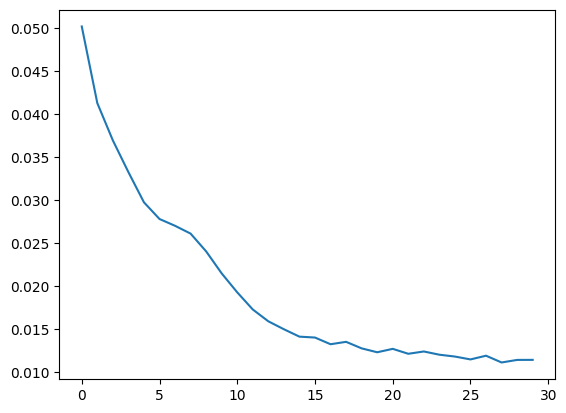

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [25]:
last_train_batch = scaled_train[-90:]

In [26]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [27]:
model.predict(last_train_batch) # predicted value

1/1 [==============================] - 0s 276ms/step


array([[0.43286937]], dtype=float32)

In [28]:
scaled_test[0] # actual value

array([0.40533603])

In [29]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 45ms/step


In [30]:
test_predictions

[array([0.43286937], dtype=float32),
 array([0.02960782], dtype=float32),
 array([0.4119785], dtype=float32),
 array([0.37866095], dtype=float32),
 array([0.35700753], dtype=float32),
 array([0.35738832], dtype=float32),
 array([0.4256025], dtype=float32),
 array([0.3865072], dtype=float32),
 array([0.05757227], dtype=float32),
 array([0.6610317], dtype=float32),
 array([0.5324894], dtype=float32),
 array([0.48207346], dtype=float32),
 array([0.45719364], dtype=float32),
 array([0.49526328], dtype=float32),
 array([0.38018668], dtype=float32),
 array([0.0097817], dtype=float32),
 array([0.51340926], dtype=float32),
 array([0.47876048], dtype=float32),
 array([0.44926548], dtype=float32),
 array([0.4328026], dtype=float32),
 array([0.48727167], dtype=float32),
 array([0.39899176], dtype=float32),
 array([0.01606742], dtype=float32),
 array([0.5749903], dtype=float32),
 array([0.518082], dtype=float32),
 array([0.47771782], dtype=float32),
 array([0.45149517], dtype=float32),
 array([0.5

In [31]:
test_data.head()

,Sales
Date,
2015-06-20,5731.534529
2015-06-21,224.079821
2015-06-22,5876.715695
2015-06-23,5643.382960
2015-06-24,5612.039462


In [32]:
true_predictions = scaler.inverse_transform(test_predictions)

In [33]:
test_data['Prediction'] = true_predictions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15412\693310255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = true_predictions


In [34]:
test_data

,Sales,Prediction
Date,,
2015-06-20,5731.534529,6114.932648
2015-06-21,224.079821,499.569559
2015-06-22,5876.715695,5824.030195
2015-06-23,5643.382960,5360.087550
2015-06-24,5612.039462,5058.566663
2015-06-25,5571.088789,5063.869033
2015-06-26,5950.391928,6013.742329
2015-06-27,5863.958744,5469.345754
2015-06-28,235.577578,888.970735


<AxesSubplot:xlabel='Date'>

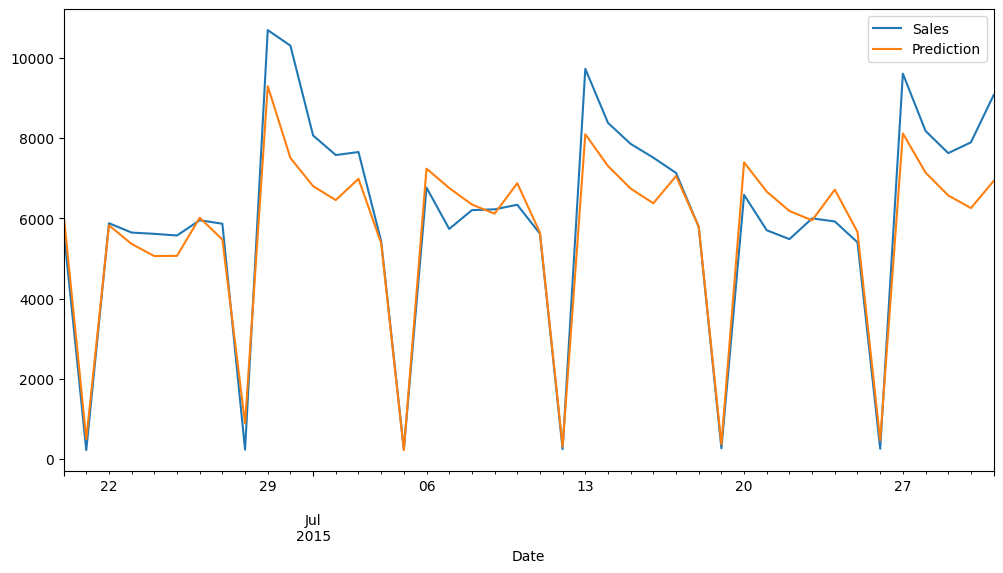

In [35]:
test_data.plot(figsize = (12,6))

In [ ]:
import pandas as pd

# Define the start date
start_date = '2015-08-01'

# Generate a date range for six weeks
date_range = pd.date_range(start=start_date, periods=6*7, freq='D')

# Create a DataFrame with the date range
validation_df = pd.DataFrame({'Date': date_range})

print(validation_df)


In [61]:
predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(validation_df)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    validation_df.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 394ms/step


AttributeError: 'DataFrame' object has no attribute 'append'

In [37]:
import os
import pickle
from time import gmtime, strftime
from pathlib import Path

def save_model(model, model_name):
    try:
        time_str = strftime("%Y-%m-%d-%H-%M-%S", gmtime())  # Replace colons with dashes
        models_directory = Path("D:/project/models")  # Create 'models' directory
        name = models_directory / f'{model_name}_{time_str}.pkl'  # Set path for model file
        with open(name, "wb") as file:
            pickle.dump(model, file)
    except Exception as e:
        print(f"Error saving model: {e}")

# Assuming 'model' is your trained LSTM model
save_model(model, 'LSTM_sale')


In [40]:
def load_model(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return model

In [41]:
# Load scaler
def load_scaler(scaler_path):
    with open(scaler_path, 'rb') as file:
        scaler = pickle.load(file)
    return scaler

In [42]:
n_input = 90  # Same as defined during training

In [43]:
# Define function to predict sales
from datetime import datetime, timedelta
def predict_sales(start_date_str):
    try:
        # Load model and scaler
        model_path = 'D:\project\models\LSTM_sales_2024-04-09-14-12-54.pkl'
        scaler_path = 'D:\project\models\scaler.pkl'
        model = load_model(model_path)
        scaler = load_scaler(scaler_path)

        # Get the starting date
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

        # Generate data for prediction
        input_data = []
        current_date = start_date - timedelta(days=n_input)
        for _ in range(n_input):
            current_date += timedelta(days=1)
            # You should replace 'feature_value' with the actual feature value you want to predict
            feature_value = 0  # You need to decide how to obtain this feature value
            input_data.append(feature_value)

        # Scale the input data
        scaled_input = scaler.transform(np.array(input_data).reshape(-1, 1))

        # Make predictions
        predictions = []
        current_batch = scaled_input.reshape((1, n_input, 1))
        for _ in range(6):  # Predict for six weeks
            current_pred = model.predict(current_batch)[0][0]
            predictions.append(current_pred)
            current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

        # Inverse scale the predictions
        scaled_predictions = np.array(predictions).reshape(-1, 1)
        true_predictions = scaler.inverse_transform(scaled_predictions)

        # Generate date range for the predictions
        prediction_dates = [start_date + timedelta(weeks=i) for i in range(6)]

        # Format predictions and dates
        prediction_data = [{'Date': date.strftime('%Y-%m-%d'), 'Sales': sales}
                           for date, sales in zip(prediction_dates, true_predictions)]

        return prediction_data

    except Exception as e:
        return {'error': str(e)}

In [44]:
start_date_str = '2015-09-17'
predictions = predict_sales(start_date_str)
print(predictions)

d:\project\pvenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 415ms/step
{'error': 'all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)'}


In [55]:
start_date_str = '2015-09-17'
predictions = predict_sales(start_date_str)
print(predictions)

Shape of input_data before scaling: (90,)
Shape of scaled_input: (90, 1)
Shape of current_batch before prediction (iteration 0): (1, 90, 1)


d:\project\pvenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 252ms/step
Prediction (iteration 0): 0.529816746711731
{'error': 'all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)'}


In [58]:
# Define function to predict sales
from datetime import datetime, timedelta

def predict_Sales(start_date_str):
    try:
        # Load model
        model_path = 'D:\project\models\LSTM_sales_2024-04-09-14-12-54.pkl'
        model = load_model(model_path)

        # Get the starting date
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

        # Generate data for prediction
        input_data = []
        current_date = start_date - timedelta(days=n_input)
        for _ in range(n_input):
            current_date += timedelta(days=1)
            # You should replace 'feature_value' with the actual feature value you want to predict
            feature_value = 0  # You need to decide how to obtain this feature value
            input_data.append(feature_value)

        # Make predictions
        predictions = []
        current_batch = np.array(input_data).reshape((1, n_input, 1))
        for _ in range(6):  # Predict for six weeks
            current_pred = model.predict(current_batch)[0][0]
            predictions.append(current_pred)
            current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

        # Format predictions and dates
        prediction_dates = [start_date + timedelta(weeks=i) for i in range(6)]
        prediction_data = [{'Date': date.strftime('%Y-%m-%d'), 'Sales': sales} for date, sales in zip(prediction_dates, predictions)]

        return prediction_data

    except Exception as e:
        return {'error': str(e)}


In [59]:
start_date_str = '2024-04-09'  # Example start date
predictions = predict_Sales(start_date_str)
print(predictions)

1/1 [==============================] - 0s 172ms/step
{'error': 'all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)'}
